Exercise:

[Webpage](https://forecast.weather.gov/MapClick.php?lat=37.777120000000025&lon=-122.41963999999996)

Extract the 5 days weather from san Francisco in weather.gov.<br>
inspect with the console<br>
write code to target the right elements of the text<br>
For each day, you need to store:<br>
The day of the week (Saturday)<br>
The date (12/09)<br>
A short description of the conditions (Clear early then increasing cloudiness after midnight. Low 41F. Winds light and variable)<br>
The temperature low and high, with a function of your own to convert into Celsius<br>
For each element you scrape, The name of the item you targetted (ex: DailyContent--daypartDate--3MM0J)<br>
Save all of this into a Pandas dataframe<br>

# Webscrape 2

Okay, my first attempt was not the best, but with a fresh mindset I believe I can handle this.

![webscrapethings](/work/webscrape things.png)

[('Today', '', 'Sunny', 'High: 68 °F'), ('Tonight', '', 'Mostly Clear', 'Low: 47 °F'), ('Monday', '', 'Sunny', 'High: 66 °F'), ('MondayNight', '', 'Clear', 'Low: 49 °F'), ('Tuesday', '', 'Sunny', 'High: 74 °F'), ('TuesdayNight', '', 'Clear', 'Low: 52 °F'), ('Wednesday', '', 'Sunny', 'High: 76 °F'), ('WednesdayNight', '', 'Mostly Clear', 'Low: 51 °F'), ('Thursday', '', 'Sunny', 'High: 73 °F')]
('Today', '', 'Sunny', 'High: 68 °F')
('Tonight', '', 'Mostly Clear', 'Low: 47 °F')
('Monday', '', 'Sunny', 'High: 66 °F')
('MondayNight', '', 'Clear', 'Low: 49 °F')
('Tuesday', '', 'Sunny', 'High: 74 °F')
('TuesdayNight', '', 'Clear', 'Low: 52 °F')
('Wednesday', '', 'Sunny', 'High: 76 °F')
('WednesdayNight', '', 'Mostly Clear', 'Low: 51 °F')
('Thursday', '', 'Sunny', 'High: 73 °F')
                0           1             2            3   4
0           Today  2021-03-28         Sunny  High: 68 °F  20
1         Tonight  2021-03-28  Mostly Clear   Low: 47 °F   8
2          Monday  2021-03-29      

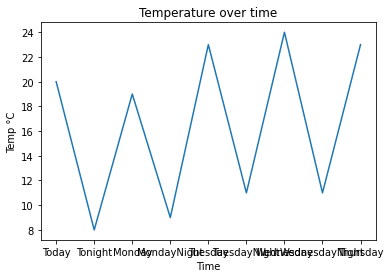

In [9]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime



# First things first, request the webpage and store it
webpage = requests.get("https://forecast.weather.gov/MapClick.php?lat=37.777120000000025&lon=-122.41963999999996")
soup = bs(webpage.content, "html.parser")

#print(soup.prettify())

# We now have all the data we need, it's just a matter of isolating the useful stuff
# We can use the soup.children to move a level deeper in the html
# [2] because that's where the data we want is for THIS website, others may be different
# The first line of the output will probably display the tag

#print(list(soup.children)[2])
html = list(soup.children)[2]

#print(list(html.children)[3])
body = list(html.children)[3]

#print(list(body.children)[1])
main = list(body.children)[1]

#print(list(main.children)[5])
content = list(main.children)[5]

# Finally we are at a level that's useful
ptags = content.find_all("p")

# # This is most of the information we need, but also some that we do not.
# for element in ptags:
#     print(element.text)
# # Specifically we need indexes [7:43]
ptag_slice = ptags[7:43]

# Now we have 36 elements (Indexes 0-35), 36 elements / 9 days = 4 each
infogrid = []
for index in range(0, len(ptag_slice), 4):

    # This long command here just makes a nested list of [Day Index][Piece of info]
    infogrid.append( (ptag_slice[index].text, ptag_slice[index+1].text, ptag_slice[index+2].text, ptag_slice[index+3].text) )

print(infogrid)
for day in infogrid:
    print(day)

df = pd.DataFrame(infogrid)
today = datetime.date.today()

# Making the dates from knowing what day today is
dates_if_morning = [today, today, today + datetime.timedelta(days=1), today + datetime.timedelta(days=1), today + datetime.timedelta(days=2), today + datetime.timedelta(days=2), today + datetime.timedelta(days=3), today + datetime.timedelta(days=3), today + datetime.timedelta(days=4)]
# The website we are using doesn't show a "Today" if it's currently the evening, this shifts what information we get so we need to account for that
# Difference is that data would start at "Tonight" and end Night of 5th day
dates_if_tonight = dates_if_morning[1:]
dates_if_tonight.append(today + datetime.timedelta(days=4))

if df[0][0] == "Today":
    df[1] = dates_if_morning
else:
    df[1] = dates_if_tonight



# Farenheight to celcius ( Celsius (°C) = (Fahrenheit - 32) / 1.8 )
# First is putting the Farenheight values in a seperate column 
df[4] =  list (df[3].str.slice(-5, -3) )

# Next is the conversion, the values are currently stores as strings so handle that as well
df[4] = ( (df[4].astype(int) - 32) / 1.8 ).round(0).astype(int)
plt.plot(df[0], df[4], label="Temperature °C")
plt.xlabel("Time")
plt.ylabel("Temp °C")
plt.title("Temperature over time")




print(df)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d4f89134-1db1-4516-a5b4-efb5af5c179c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>